In [41]:
import sys
import pandas as pd
import numpy as np

sys.path.append("..")
from functions import load_month

In [42]:
df_m = load_month("01", 2014)
df_m.head()


,contractid,planid,org_type,plan_type,partd,snp,eghp,org_name,org_marketing_name,plan_name,parent_org,contract_date,ssa,fips,state,county,enrollment,month,year
0,90091,NaN,HCPP - 1833 Cost,HCPP - 1833 Cost,No,No,No,UNITED MINE WORKERS OF AMERICA HLTH & RETIREMENT,United Mine Workers of America Health & Retire...,NaN,UMWA Health and Retirement Funds,02/01/1974,NaN,NaN,NaN,NaN,NaN,1,2014
1,E0654,801.0,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,No,Yes,IBT VOLUNTARY EMPLOYEE BENEFITS TRUST,TEAMStar Medicare Part D Prescription Drug Pro...,IBT VEBA (Employer PDP),IBT Voluntary Employee Benefits Trust,01/01/2007,61000.0,NaN,NaN,NaN,NaN,1,2014
2,E0654,801.0,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,No,Yes,IBT VOLUNTARY EMPLOYEE BENEFITS TRUST,TEAMStar Medicare Part D Prescription Drug Pro...,IBT VEBA (Employer PDP),IBT Voluntary Employee Benefits Trust,01/01/2007,62060.0,NaN,NaN,NaN,NaN,1,2014
3,E0654,801.0,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,No,Yes,IBT VOLUNTARY EMPLOYEE BENEFITS TRUST,TEAMStar Medicare Part D Prescription Drug Pro...,IBT VEBA (Employer PDP),IBT Voluntary Employee Benefits Trust,01/01/2007,2198.0,NaN,NaN,NaN,NaN,1,2014
4,E0654,801.0,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,No,Yes,IBT VOLUNTARY EMPLOYEE BENEFITS TRUST,TEAMStar Medicare Part D Prescription Drug Pro...,IBT VEBA (Employer PDP),IBT Voluntary Employee Benefits Trust,01/01/2007,2275.0,NaN,NaN,NaN,NaN,1,2014


In [43]:
def clean_ma(df):
    df = df.copy()

    # Drop SNPs
    df = df[df["snp"].fillna("No") != "Yes"]

    # Drop prescription drug only (PDP)
    df = df[~df["plan_type"].fillna("").str.contains("PDP", case=False)]

    # Drop 800-series plans (planid 800-899)
    planid_num = pd.to_numeric(df["planid"], errors="coerce")
    df = df[~planid_num.between(800, 899, inclusive="both")]

    return df


In [44]:
df_m_clean = clean_ma(df_m)
df_m.shape, df_m_clean.shape


((2396401, 19), (382435, 19))

In [45]:
def summarize_year(year):
    total_enroll = 0.0
    unique_contract_plan = set()

    for m in range(1, 13):
        m_str = f"{m:02d}"
        try:
            df = load_month(m_str, year)
            df = clean_ma(df)

            # enrollment (sum)
            total_enroll += df["enrollment"].fillna(0).sum()

            # unique contract-plan pairs
            pairs = df[["contractid", "planid"]].drop_duplicates()
            unique_contract_plan.update(map(tuple, pairs.values))

            print(f"{year}-{m_str}: rows={len(df):,}")
        except FileNotFoundError:
            print(f"Missing {year}-{m_str}")

    return {
        "year": year,
        "total_enrollment": total_enroll,
        "unique_contract_plan": len(unique_contract_plan),
    }


In [46]:
s2014 = summarize_year(2014)
s2014


2014-01: rows=382,435
2014-02: rows=375,817
2014-03: rows=374,676
2014-04: rows=369,627
2014-05: rows=369,287
2014-06: rows=372,004
2014-07: rows=369,566
2014-08: rows=370,902
2014-09: rows=374,256
2014-10: rows=374,054
2014-11: rows=374,549
2014-12: rows=381,014


{'year': 2014,
 'total_enrollment': np.float64(352812963.0),
 'unique_contract_plan': 3664}

In [47]:
years = list(range(2014, 2020))  # 2014–2019
summaries = []

for y in years:
    print("\n====================")
    print("Starting year", y)
    summaries.append(summarize_year(y))

summary_df = pd.DataFrame(summaries)
summary_df



Starting year 2014
2014-01: rows=382,435
2014-02: rows=375,817
2014-03: rows=374,676
2014-04: rows=369,627
2014-05: rows=369,287
2014-06: rows=372,004
2014-07: rows=369,566
2014-08: rows=370,902
2014-09: rows=374,256
2014-10: rows=374,054
2014-11: rows=374,549
2014-12: rows=381,014

Starting year 2015
2015-01: rows=347,150
2015-02: rows=344,128
2015-03: rows=345,809
2015-04: rows=342,303
2015-05: rows=340,360
2015-06: rows=342,637
2015-07: rows=341,934
2015-08: rows=342,859
2015-09: rows=347,839
2015-10: rows=347,340
2015-11: rows=348,429
2015-12: rows=354,158

Starting year 2016
2016-01: rows=333,619
2016-02: rows=329,301
2016-03: rows=331,681
2016-04: rows=327,847
2016-05: rows=326,768
2016-06: rows=328,749
2016-07: rows=327,515
2016-08: rows=328,693
2016-09: rows=332,274
2016-10: rows=331,015
2016-11: rows=331,509
2016-12: rows=337,678

Starting year 2017
2017-01: rows=318,506
2017-02: rows=311,014
2017-03: rows=312,365
2017-04: rows=307,770
2017-05: rows=306,532
2017-06: rows=308,

,year,total_enrollment,unique_contract_plan
0,2014,352812963.0,3664
1,2015,372631189.0,3419
2,2016,391355645.0,3343
3,2017,406389706.0,3224
4,2018,418438409.0,3543
5,2019,428523913.0,4087


In [48]:
summary_df.to_csv("../ma_summary_2014_2019.csv", index=False)


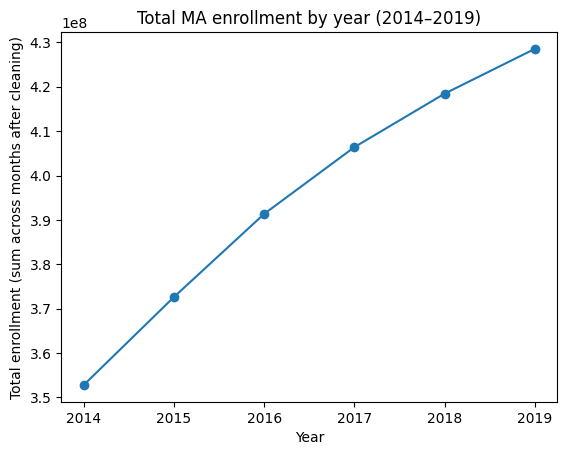

In [49]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(summary_df["year"], summary_df["total_enrollment"], marker="o")
plt.xlabel("Year")
plt.ylabel("Total enrollment (sum across months after cleaning)")
plt.title("Total MA enrollment by year (2014–2019)")
plt.show()


## HCRIS


import os
os.getcwd()

import pandas as pd
import os

base = os.path.expanduser("~/hcris-data")
rpt_path_2012 = os.path.join(base, "hosp10_2012_RPT.CSV")
print("RPT 2012 exists?", os.path.exists(rpt_path_2012))


In [50]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base = os.path.expanduser("~/hcris-data")
years = list(range(2012, 2020))  # 2012–2019

out = []

for y in years:
    f = os.path.join(base, f"hosp10_{y}_rpt.csv")
    if not os.path.exists(f):
        print("Missing:", y)
        continue

    # usecols keeps memory low
    rpt_raw = pd.read_csv(f, header=None, encoding="latin1", usecols=[2,5])
    rpt_raw.columns = ["prvdr_num", "fy_bgn_dt"]
    rpt_raw["fy_bgn_dt"] = pd.to_datetime(rpt_raw["fy_bgn_dt"], errors="coerce")
    rpt_raw["year"] = rpt_raw["fy_bgn_dt"].dt.year

    counts = (
        rpt_raw.dropna(subset=["prvdr_num","year"])
               .groupby(["prvdr_num","year"])
               .size()
               .reset_index(name="n_reports")
    )

    n_multi = counts[counts["n_reports"] > 1]["prvdr_num"].nunique()
    out.append({"year": y, "n_hosp_multi_reports": n_multi})

multi_by_year = pd.DataFrame(out).sort_values("year")
multi_by_year


,year,n_hosp_multi_reports
0,2012,59
1,2013,68
2,2014,67
3,2015,86
4,2016,62
5,2017,51
6,2018,68
7,2019,59


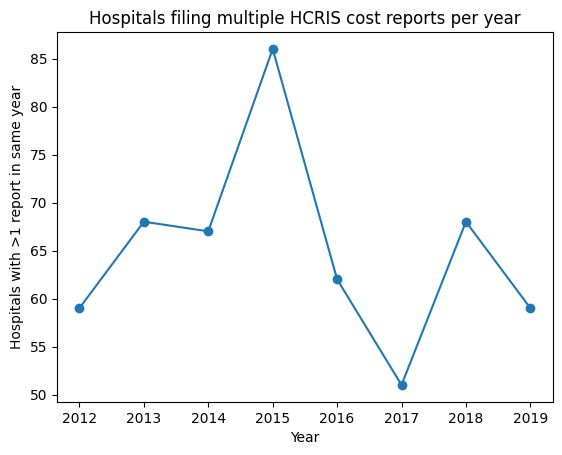

In [51]:
plt.figure()
plt.plot(multi_by_year["year"], multi_by_year["n_hosp_multi_reports"], marker="o")
plt.xlabel("Year")
plt.ylabel("Hospitals with >1 report in same year")
plt.title("Hospitals filing multiple HCRIS cost reports per year")
plt.show()


In [52]:
import pandas as pd
import os

base = os.path.expanduser("~/hcris-data")
years = list(range(2012, 2020))

all_rpt = []

for y in years:
    f = os.path.join(base, f"hosp10_{y}_rpt.csv")
    rpt = pd.read_csv(f, header=None, encoding="latin1", usecols=[0,2,5])  # 0=rpt_rec_num, 2=provider, 5=fy_bgn_dt
    rpt.columns = ["rpt_rec_num", "prvdr_num", "fy_bgn_dt"]
    rpt["fy_bgn_dt"] = pd.to_datetime(rpt["fy_bgn_dt"], errors="coerce")
    rpt["year"] = rpt["fy_bgn_dt"].dt.year
    all_rpt.append(rpt)

rpt_all = pd.concat(all_rpt, ignore_index=True)

# Drop rows missing provider/year
rpt_all = rpt_all.dropna(subset=["prvdr_num", "year"])

# "Combine multiple reports": keep the report with the largest rpt_rec_num within each provider-year
rpt_one_per_year = (
    rpt_all.sort_values(["prvdr_num", "year", "rpt_rec_num"])
           .drop_duplicates(subset=["prvdr_num", "year"], keep="last")
)

# ANSWER: unique provider numbers after combining multiple reports
n_unique_providers = rpt_one_per_year["prvdr_num"].nunique()
n_unique_providers


6645

### Unique hospital IDs after combining multiple reports

After removing/combining all of these reports, there were a total of 6645 unique hospital IDS that existed within the data 

--> for this assignment, I realized I used the HCRIS data from your git hub repo and all that raw data, instead of the ma-data... this is the rough draft of the assignment but I do understand the issue I made and I know it will be much more simple to answer these questions with the ma-data provided in Homework1 for the final draft of this assignment. 